In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import parallel_coordinates
import numpy as np
import sklearn 
import scipy.stats as stats

Service_Barrier = pd.read_csv('Service_Barrier.csv',encoding = 'ISO-8859-1')
Avoidable_Death = pd.read_csv('Avoidable_Death.csv',encoding = 'ISO-8859-1')
Health_Risk_Factor = pd.read_csv('Health_Risk_Factor.csv',encoding = 'ISO-8859-1')
Avoidable_Death.dropna()
Health_Risk_Factor.dropna()

#Health_Risk_Factor_RAC =    Health_Risk_Factor['RiskAlcoholConsumption_per100'] #Risk Alcohol Consumption
#Health_Risk_Factor_High_Blood_Pressure =    Health_Risk_Factor['HighBloodPressure_pre100']
Health_Risk_Factor_Fruit_Adequate_Intake =    Health_Risk_Factor['FruitAdequateIntake_per100']
#Health_Risk_Factor_Overweight =    Health_Risk_Factor['Overweight_per100']
Health_Risk_Factor_Low_Exercise =    Health_Risk_Factor['LowExercise_per100']
Health_Risk_Factor_Psychological_Distress =    Health_Risk_Factor['PsychologicalDistress_per100']
Health_Risk_Factor_Smoker =    Health_Risk_Factor['Somker_per100']
Health_Risk_Factor_Obese =    Health_Risk_Factor[' obese_per100']
Health_Risk_Factor_RiskWaistMearsurement =    Health_Risk_Factor['RiskWaistMearsurement_per100']


Avoidable_Death_Cancer = Avoidable_Death['cancer_per100,000']
Avoidable_Death_Diab = Avoidable_Death['diabetes_per100,000']
Avoidable_Death_Colo = Avoidable_Death['colorectal_per100,000']
Avoidable_Death_Pulm = Avoidable_Death['pulmonary _per100,000']
Avoidable_Death_Cereb = Avoidable_Death['cerebrovascular _per100,000']
Avoidable_Death_Total = Avoidable_Death_Cancer + Avoidable_Death_Diab + Avoidable_Death_Colo \
+ Avoidable_Death_Pulm + Avoidable_Death_Cereb

Avoidable_Death['Avoidable_Death_Total'] = Avoidable_Death_Total
Avoidable_Death = Avoidable_Death.dropna()

Health_Risk_Factor = Health_Risk_Factor.dropna()
print(Health_Risk_Factor.keys())

Index([' lga_code', ' lga_name', 'RiskAlcoholConsumption_per100',
       ' obese_per100', 'FruitAdequateIntake_per100',
       'RiskWaistMearsurement_per100', 'LowExercise_per100',
       'PsychologicalDistress_per100', 'Somker_per100'],
      dtype='object')


## Outerlier Analysis

Text(0,0.5,'Number of Avoidable Death')

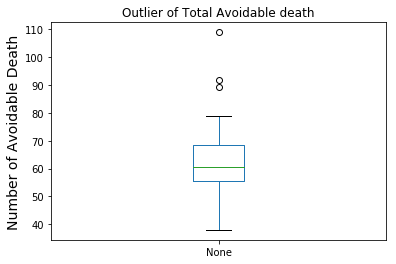

In [45]:
Avoidable_Death_Total.plot(kind = 'box')
plt.title("Outlier of Total Avoidable death")
plt.ylabel("Number of Avoidable Death", fontsize = 14)

In [64]:
Avoidable_Death.sort_values(['Avoidable_Death_Total'], ascending = False)

,lga_code,lga_name,"diabetes_per100,000","cancer_per100,000","colorectal_per100,000","pulmonary _per100,000","cerebrovascular _per100,000",Avoidable_Death_Total
57,25810,Northern Grampians (S),11.9,53.9,13.3,16.5,13.3,108.9
14,21670,Central Goldfields (S),14.1,40.4,13.3,13.0,10.9,91.7
1,20260,Ararat (RC),13.0,34.6,13.2,12.5,15.8,89.1
70,26810,Wellington (S),5.9,40.0,10.9,9.0,13.1,78.9
7,21010,Benalla (RC),10.3,37.5,9.2,6.6,11.5,75.1
28,22910,Hepburn (S),5.6,35.1,14.4,10.6,9.2,74.9
2,20570,Ballarat (C),5.1,34.9,12.8,12.0,9.8,74.6
19,22170,Frankston (C),6.7,33.9,12.4,12.7,7.3,73.0
31,23190,Horsham (RC),10.9,29.0,10.9,6.8,14.8,72.4
69,26730,Warrnambool (C),8.0,32.6,9.4,9.8,11.8,71.6


## Avoid Death Total

Pearson r is  -0.655342210612566


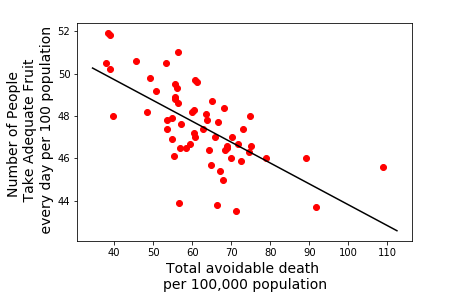

In [33]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')



df1 = pd.DataFrame({'Avoidable_Death_Total': Avoidable_Death_Total, \
                    'Health_Risk_Factor_Fruit_Adequate_Intake':  Health_Risk_Factor_Fruit_Adequate_Intake})
plt.scatter(df1.iloc[:, 0], df1.iloc[:,1], color = 'r')
df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
plt.xlabel('Total avoidable death \nper 100,000 population', fontsize=14)
plt.ylabel('Number of People \n Take Adequate Fruit\n every day per 100 population', fontsize=14)
plt.title("Avoidable_Death_Total VS Health_Risk_Factor_Fruit_Adequate_Intake", color = 'w')
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.6293938337921389


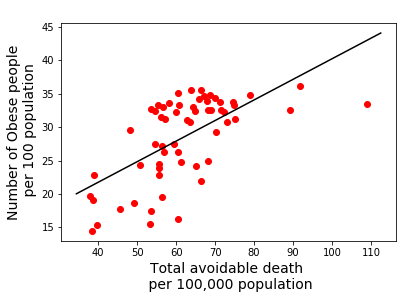

In [34]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


df1 = pd.DataFrame({'Avoidable_Death_Total': Avoidable_Death_Total, \
                    'Health_Risk_Factor_Obese': Health_Risk_Factor_Obese})

plt.scatter(df1.iloc[:, 0], df1.iloc[:,1], color = 'r')
df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
plt.xlabel('Total avoidable death \n per 100,000 population', fontsize=14)
plt.ylabel('Number of Obese people\n per 100 population', fontsize=14)
plt.title("Avoidable_Death_Total VS Health_Risk_Factor_Obese", color = 'w')
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.575900267405388


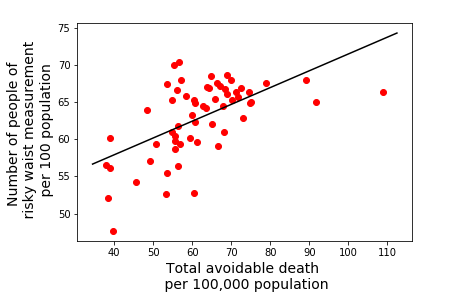

In [35]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')



df1 = pd.DataFrame({'Avoidable_Death_Total': Avoidable_Death_Total, \
                    'Health_Risk_Factor_RiskWaistMearsurement': Health_Risk_Factor_RiskWaistMearsurement})

plt.scatter(df1.iloc[:, 0], df1.iloc[:,1], color = 'r')
df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
plt.xlabel('Total avoidable death \n per 100,000 population', fontsize=14)
plt.ylabel('Number of people of \n risky waist measurement\n per 100 population', fontsize=14)
plt.title("Avoidable_Death_Total VS Health_Risk_Factor_RiskWaistMearsurement", color = 'w')
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.5400859416986464


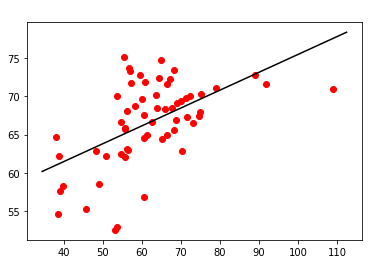

In [144]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')



df1 = pd.DataFrame({'Avoidable_Death_Total': Avoidable_Death_Total, \
                    'Health_Risk_Factor_Low_Exercise': Health_Risk_Factor_Low_Exercise})

plt.scatter(df1.iloc[:, 0], df1.iloc[:,1], color = 'r')
df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
plt.title("Avoidable_Death_Total VS Health_Risk_Factor_Low_Exercise", color = 'w')
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.6084034293181976


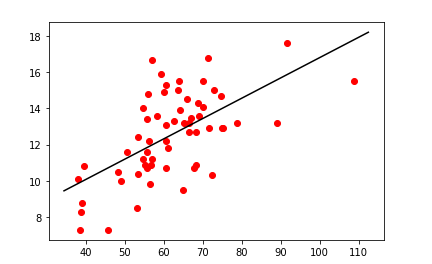

In [145]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')



df1 = pd.DataFrame({'Avoidable_Death_Total': Avoidable_Death_Total, \
                    'Health_Risk_Factor_Psychological_Distress': Health_Risk_Factor_Psychological_Distress})

plt.scatter(df1.iloc[:, 0], df1.iloc[:,1], color = 'r')
df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
plt.title("Avoidable_Death_Total VS Health_Risk_Factor_Psychological_Distress", color = 'w')
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.7081045347886481


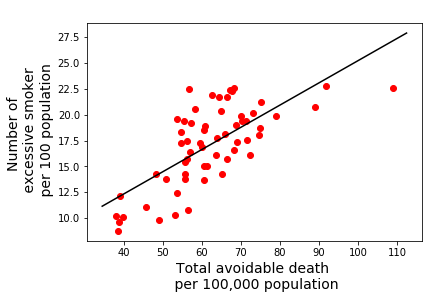

In [37]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')



df1 = pd.DataFrame({'Avoidable_Death_Total': Avoidable_Death_Total, \
                    'Health_Risk_Factor_Smoker':  Health_Risk_Factor_Smoker})

plt.scatter(df1.iloc[:, 0], df1.iloc[:,1], color = 'r')
df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
plt.xlabel('Total avoidable death \n per 100,000 population', fontsize=14)
plt.ylabel('Number of \n excessive smoker\n per 100 population', fontsize=14)
plt.title("Avoidable_Death_Total VS Health_Risk_Factor_Smoker", color = 'w')
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

## Avoid Death Cancer 

In [61]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

result = mutual_info_score(df1.iloc[:, 0], df1.iloc[:, 1])

result1 = normalized_mutual_info_score(df1.iloc[:, 0], df1.iloc[:, 1])

print("Mutual Infomation is", result)
print("Normalized Mutual Information is", result1)

Mutual Infomation is 4.138967939826629
Normalized Mutual Information is 0.9761371682663424


Pearson r is  -0.36230428409041776


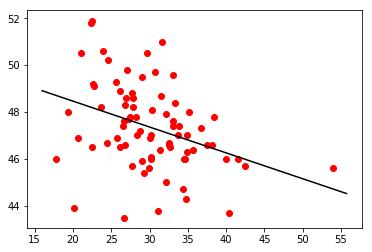

In [101]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


plt.scatter(Avoidable_Death_Cancer, Health_Risk_Factor_Fruit_Adequate_Intake, color = 'r')
df1 = pd.DataFrame({'Avoidable_Death_Cancer': Avoidable_Death_Cancer,\
                    'Health_Risk_Factor_Fruit_Adequate_Intake':Health_Risk_Factor_Fruit_Adequate_Intake})

df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.5044101364145461


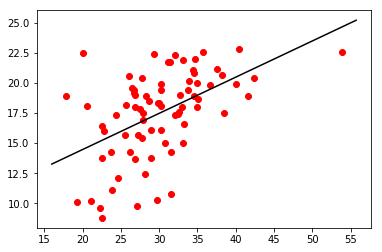

In [104]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


plt.scatter(Avoidable_Death_Cancer, Health_Risk_Factor_Psychological_Distress, color = 'r')
df1 = pd.DataFrame({'Avoidable_Death_Cancer': Avoidable_Death_Cancer,\
                    'Health_Risk_Factor_Psychological_Distress':Health_Risk_Factor_Psychological_Distress})

df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.505216015934021


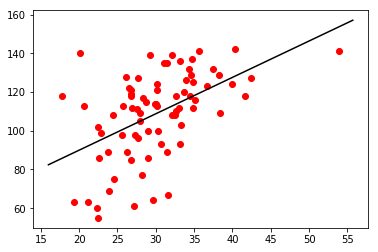

In [105]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


plt.scatter(Avoidable_Death_Cancer, Health_Risk_Factor_Smoker, color = 'r')
df1 = pd.DataFrame({'Avoidable_Death_Cancer': Avoidable_Death_Cancer,\
                    'Health_Risk_Factor_Smoker':Health_Risk_Factor_Smoker})

df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

##  Avoidable_Death_Diab

Pearson r is  -0.7178372552421928


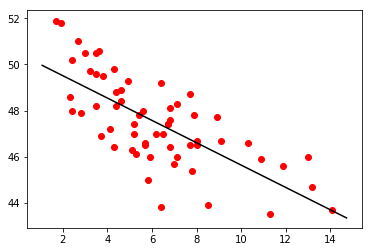

In [107]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


plt.scatter(Avoidable_Death_Diab, Health_Risk_Factor_Fruit_Adequate_Intake, color = 'r')
df1 = pd.DataFrame({'Avoidable_Death_Diab': Avoidable_Death_Diab,\
                    'Health_Risk_Factor_Fruit_Adequate_Intake':Health_Risk_Factor_Fruit_Adequate_Intake})

df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.586493877047509


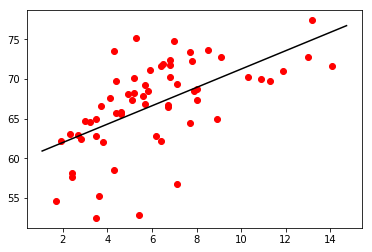

In [109]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


plt.scatter(Avoidable_Death_Diab, Health_Risk_Factor_Low_Exercise, color = 'r')
df1 = pd.DataFrame({'Avoidable_Death_Diab': Avoidable_Death_Diab,\
                    'Health_Risk_Factor_Low_Exercise': Health_Risk_Factor_Low_Exercise})

df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.6055890429939461


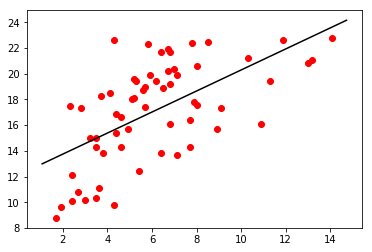

In [110]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


plt.scatter(Avoidable_Death_Diab, Health_Risk_Factor_Psychological_Distress, color = 'r')
df1 = pd.DataFrame({'Avoidable_Death_Diab': Avoidable_Death_Diab,\
                    'Health_Risk_Factor_Psychological_Distress': Health_Risk_Factor_Psychological_Distress})

df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))

Pearson r is  0.6066783273140159


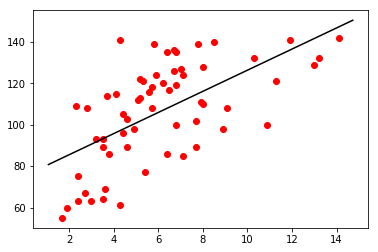

In [111]:
from scipy.stats import linregress
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color='black')


plt.scatter(Avoidable_Death_Diab, Health_Risk_Factor_Smoker, color = 'r')
df1 = pd.DataFrame({'Avoidable_Death_Diab': Avoidable_Death_Diab,\
                    'Health_Risk_Factor_Smoker': Health_Risk_Factor_Smoker})

df1 = df1.dropna()
Info = linregress(df1.iloc[:, 0], df1.iloc[:,1])
abline(Info[0], Info[1])
print("Pearson r is ",df1.iloc[:, 0].corr(df1.iloc[:, 1]))